In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

import warnings
warnings.filterwarnings(action='ignore')

# CSV 파일 불러오기
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
submission = pd.read_csv("submission.csv")

# 데이터 확인
test.head()
train.head()
submission.head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [198]:
import matplotlib.pyplot as plt  
import matplotlib.font_manager as fm  

plt.rcParams['font.family'] = 'AppleGothic'  # 또는 'NanumGothic'


In [199]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [200]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

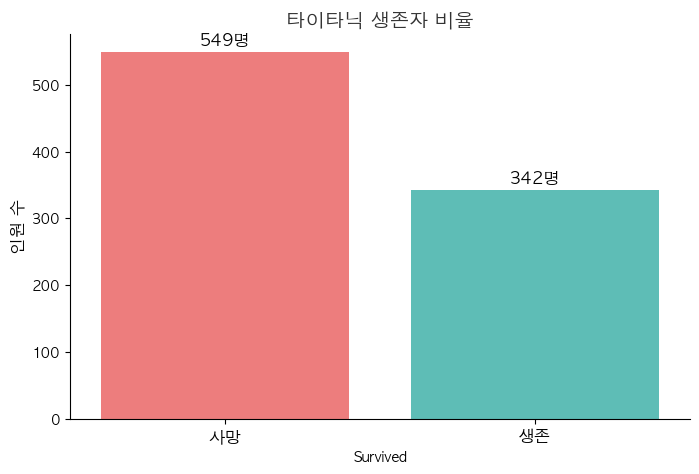

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 데이터 준비
survival_counts = train["Survived"].value_counts()
labels = ['사망', '생존']
colors = ['#FF6B6B', '#4ECDC4']  # 네온 느낌 색상

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=survival_counts.index, y=survival_counts.values, palette=colors)

# 텍스트 라벨 추가
for i, v in enumerate(survival_counts.values):
    plt.text(i, v + 10, f'{v}명', ha='center', fontsize=12, fontweight='bold', color='black')

# 그래프 스타일 설정
plt.xticks(ticks=[0, 1], labels=labels, fontsize=12, fontweight='bold', color='black')
plt.ylabel('인원 수', fontsize=12, fontweight='bold')
plt.title('타이타닉 생존자 비율', fontsize=14, fontweight='bold', color='#333333')

# 보더 스타일 변경
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()


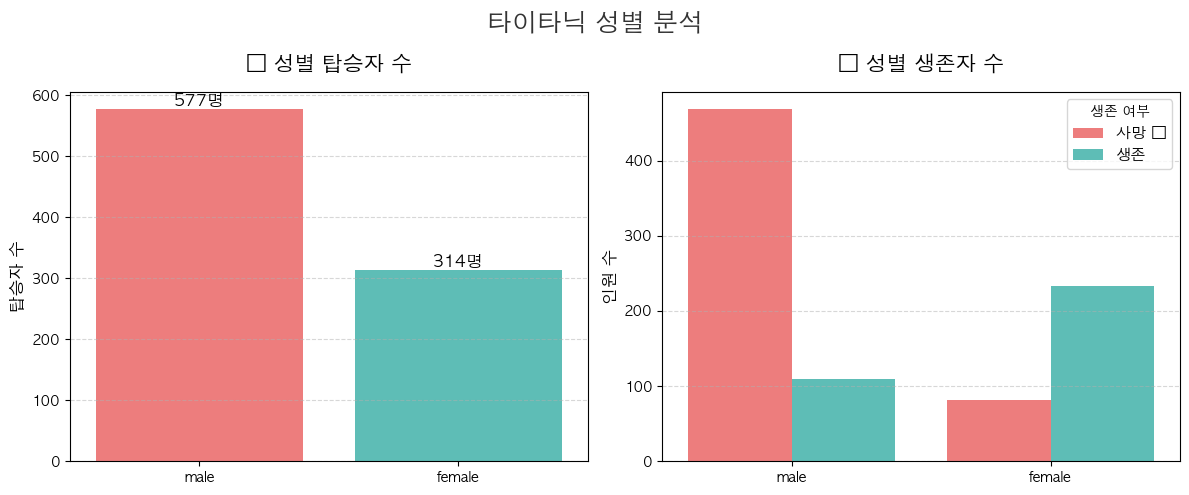

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 색상 설정
colors = ['#FF6B6B', '#4ECDC4']

# 그래프 그리기
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=100)
fig.suptitle("타이타닉 성별 분석", fontsize=18, fontweight='bold', color='#333333')

# 1. 성별 탑승자 수
sns.barplot(x=train["Sex"].value_counts().index, 
            y=train["Sex"].value_counts().values, 
            ax=axes[0], 
            palette=colors)

axes[0].set_title("🚢 성별 탑승자 수", size=15, fontweight='bold', pad=15)
axes[0].set_ylabel("탑승자 수", fontsize=12, fontweight='bold')
axes[0].set_xlabel("")
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# 막대 위에 숫자 표시
for i, v in enumerate(train["Sex"].value_counts().values):
    axes[0].text(i, v + 5, f'{v}명', ha='center', fontsize=12, fontweight='bold', color='black')

# 2. 성별 생존자 수
sns.countplot(x="Sex", hue="Survived", data=train, palette=colors, ax=axes[1])

axes[1].set_title("🛟 성별 생존자 수", size=15, fontweight='bold', pad=15)
axes[1].set_ylabel("인원 수", fontsize=12, fontweight='bold')
axes[1].set_xlabel("")
axes[1].legend(labels=['사망 💀', '생존'], title="생존 여부", loc='upper right', fontsize=11)
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


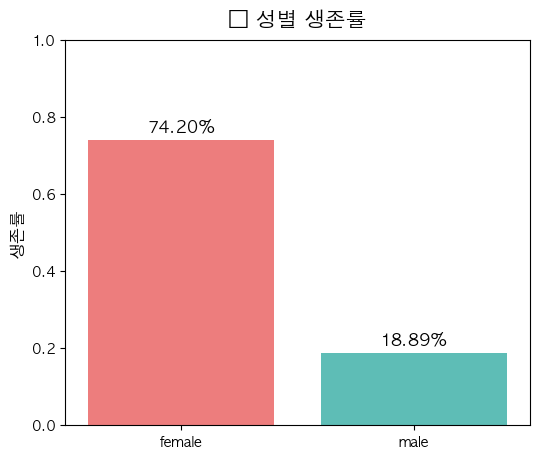

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 색상 설정
colors = ['#FF6B6B', '#4ECDC4']

# 성별 생존률 계산
survival_rate = train[['Sex', 'Survived']].groupby('Sex').mean()

# 시각화
plt.figure(figsize=(6, 5), dpi=100)
ax = sns.barplot(x=survival_rate.index, y=survival_rate.Survived, palette=colors)

# 제목 및 축 레이블 설정
ax.set_title("🛟 성별 생존률", fontsize=15, fontweight='bold', pad=10)
ax.set_ylabel("생존률", fontsize=12, fontweight='bold')
ax.set_xlabel("")

# 막대 위에 숫자 표시
for i, v in enumerate(survival_rate.Survived):
    ax.text(i, v + 0.02, f'{v:.2%}', ha='center', fontsize=12, fontweight='bold', color='black')

# y축 범위 조정
ax.set_ylim(0, 1)

plt.show()


In [204]:
train[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


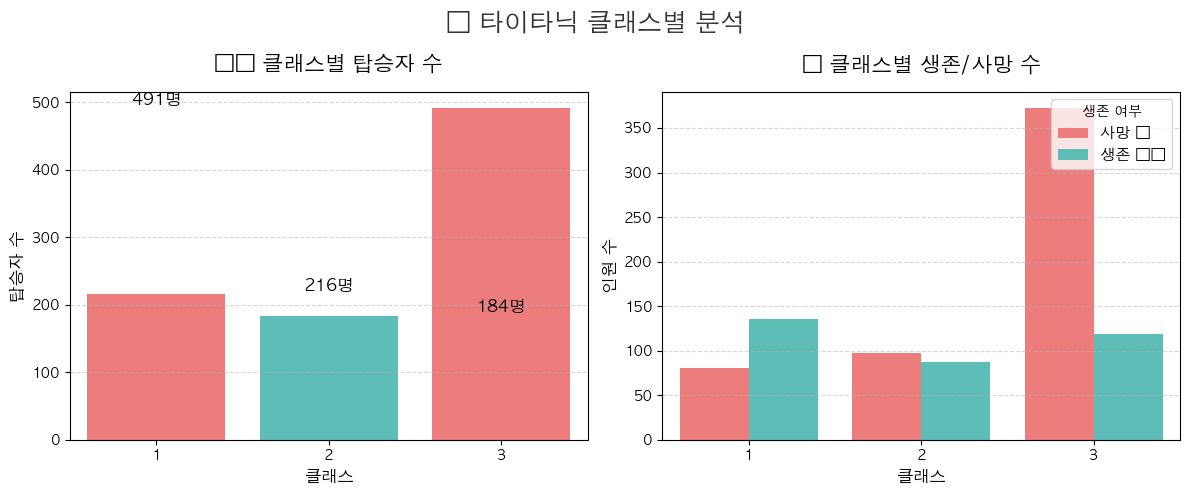

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 색상 설정
colors = ['#FF6B6B', '#4ECDC4']

# 그래프 생성
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=100)
fig.suptitle("🚢 타이타닉 클래스별 분석", fontsize=18, fontweight='bold', color='#333333')

# 1. 클래스별 탑승자 수
sns.barplot(x=train["Pclass"].value_counts().index, 
            y=train["Pclass"].value_counts().values, 
            ax=axes[0], 
            palette=colors)

axes[0].set_title("🛳️ 클래스별 탑승자 수", size=15, fontweight='bold', pad=15)
axes[0].set_ylabel("탑승자 수", fontsize=12, fontweight='bold')
axes[0].set_xlabel("클래스", fontsize=12, fontweight='bold')
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# 막대 위에 숫자 표시
for i, v in enumerate(train["Pclass"].value_counts().values):
    axes[0].text(i, v + 5, f'{v}명', ha='center', fontsize=12, fontweight='bold', color='black')

# 2. 클래스별 생존/사망 수
sns.countplot(x="Pclass", hue="Survived", data=train, palette=colors, ax=axes[1])

axes[1].set_title("🛟 클래스별 생존/사망 수", size=15, fontweight='bold', pad=15)
axes[1].set_ylabel("인원 수", fontsize=12, fontweight='bold')
axes[1].set_xlabel("클래스", fontsize=12, fontweight='bold')
axes[1].legend(labels=['사망 💀', '생존 ❤️'], title="생존 여부", loc='upper right', fontsize=11)
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


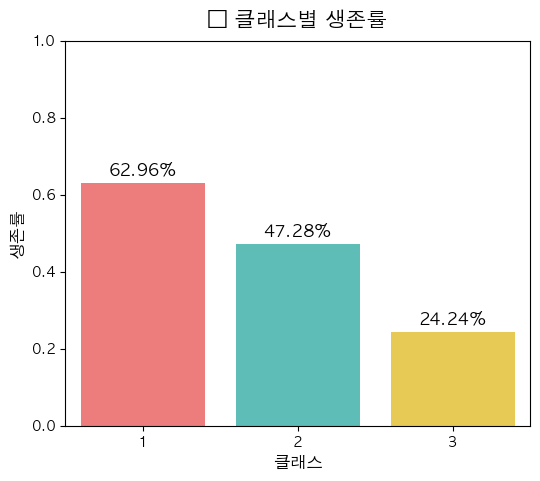

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 색상 설정
colors = ['#FF6B6B', '#4ECDC4', '#FFD93D']

# 클래스별 생존률 계산
survival_rate = train[['Pclass', 'Survived']].groupby('Pclass').mean()

# 시각화
plt.figure(figsize=(6, 5), dpi=100)
ax = sns.barplot(x=survival_rate.index, y=survival_rate.Survived, palette=colors)

# 제목 및 축 레이블 설정
ax.set_title("🚢 클래스별 생존률", fontsize=15, fontweight='bold', pad=10)
ax.set_ylabel("생존률", fontsize=12, fontweight='bold')
ax.set_xlabel("클래스", fontsize=12, fontweight='bold')

# 막대 위에 숫자 표시
for i, v in enumerate(survival_rate.Survived):
    ax.text(i, v + 0.02, f'{v:.2%}', ha='center', fontsize=12, fontweight='bold', color='black')

# y축 범위 조정
ax.set_ylim(0, 1)

plt.show()


In [207]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Density'>

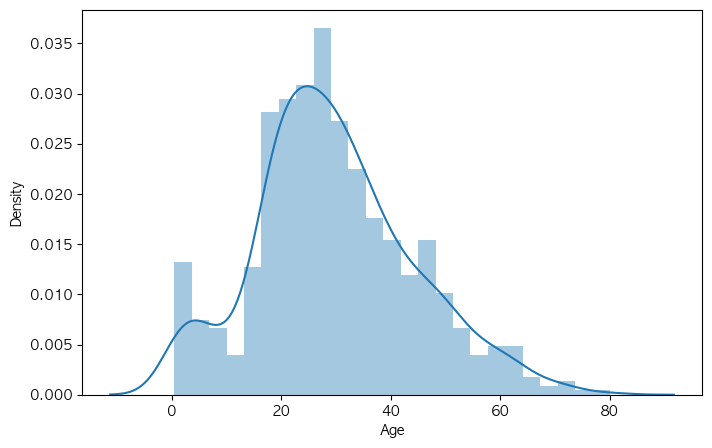

In [208]:
plt.figure(figsize=(8, 5))
sns.distplot(train['Age'], bins=25)

<Axes: xlabel='Age', ylabel='Density'>

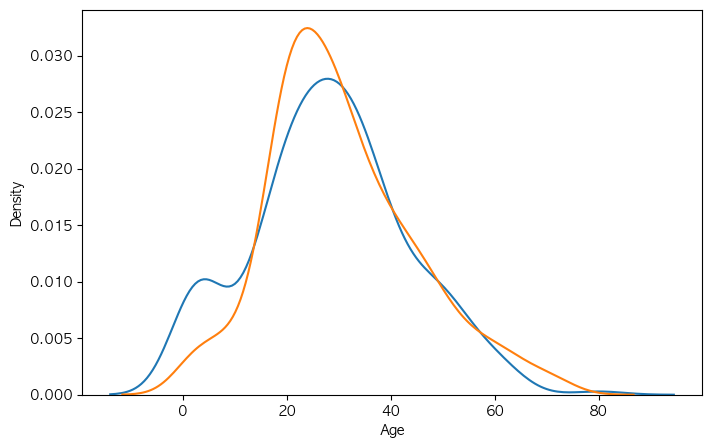

In [209]:
sur = train[train['Survived'] == 1]
dead = train[train['Survived'] == 0]

plt.figure(figsize=(8, 5))
sns.distplot(sur['Age'], bins=25, hist=False)
sns.distplot(dead['Age'], bins=25, hist=False)

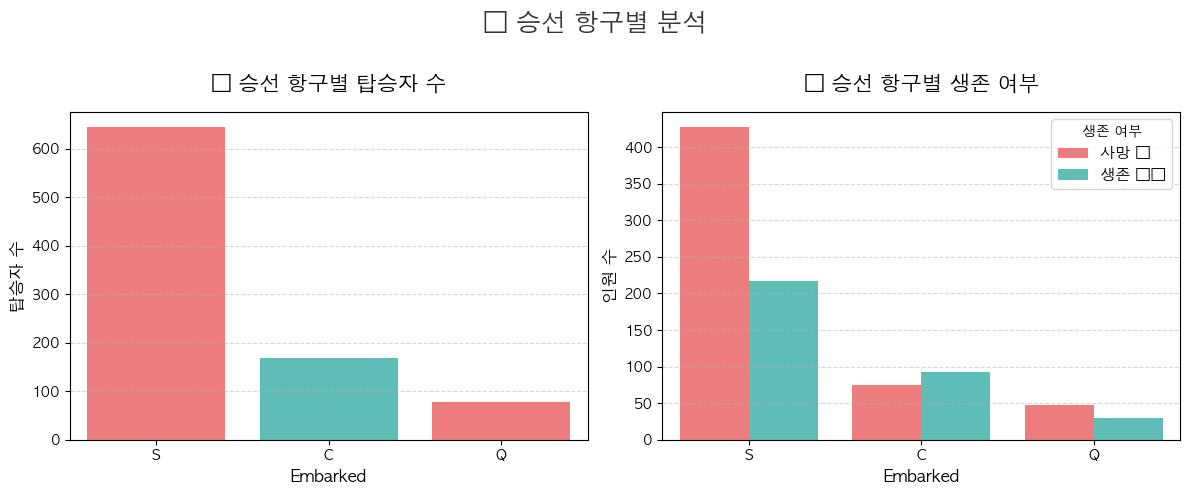

In [210]:
# 폰트 및 스타일 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
colors = ['#FF6B6B', '#4ECDC4']

# 그래프 생성
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=100)
fig.suptitle("🚢 승선 항구별 분석", fontsize=18, fontweight='bold', color='#333333')

# 승선 항구별 탑승자 수
sns.countplot(x="Embarked", data=train, ax=axes[0], palette=colors)
axes[0].set_title("📍 승선 항구별 탑승자 수", size=15, fontweight='bold', pad=15)
axes[0].set_ylabel("탑승자 수", fontsize=12, fontweight='bold')
axes[0].set_xlabel("Embarked", fontsize=12, fontweight='bold')
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# 승선 항구별 생존 여부
sns.countplot(x="Embarked", hue="Survived", data=train, ax=axes[1], palette=colors)
axes[1].set_title("🛟 승선 항구별 생존 여부", size=15, fontweight='bold', pad=15)
axes[1].set_ylabel("인원 수", fontsize=12, fontweight='bold')
axes[1].set_xlabel("Embarked", fontsize=12, fontweight='bold')
axes[1].legend(labels=['사망 💀', '생존 ❤️'], title="생존 여부", loc='upper right', fontsize=11)
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

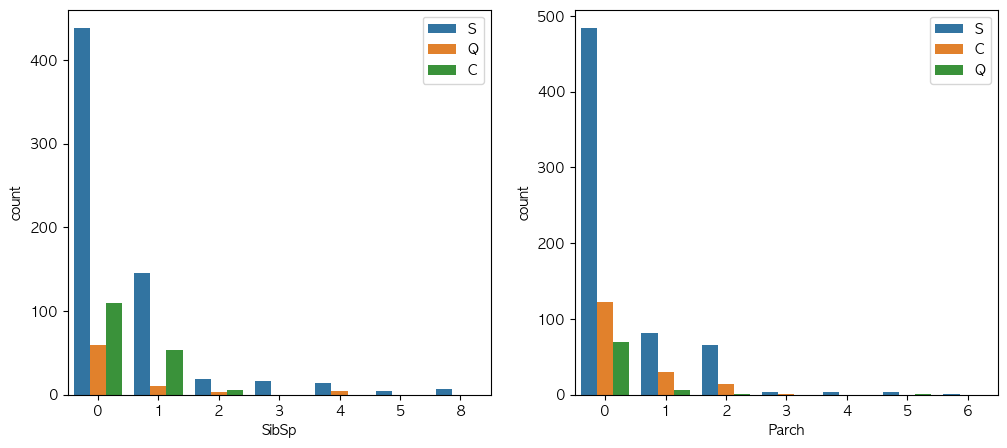

In [211]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=train, x='SibSp', hue='Embarked', ax=ax[0])
sns.countplot(data=train, x='Parch', hue='Embarked', ax=ax[1])
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
plt.show()

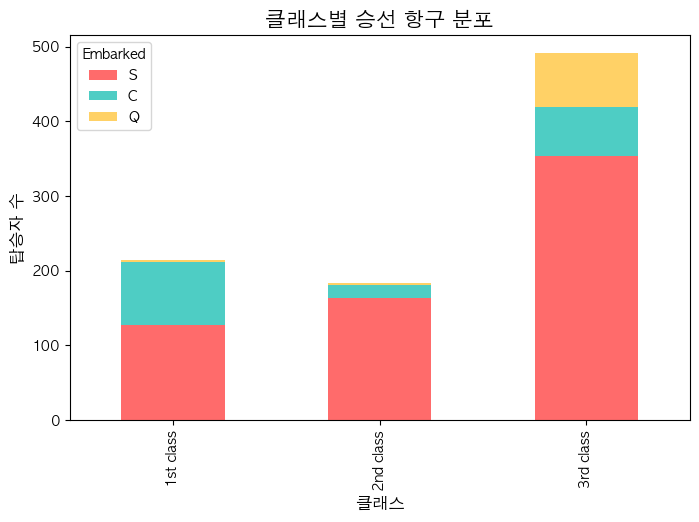

In [212]:
pc1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
pc2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
pc3 = train[train['Pclass'] == 3]['Embarked'].value_counts()
pc = pd.DataFrame([pc1, pc2, pc3])
pc.index = ['1st class', '2nd class', '3rd class']

# 색상 설정 (원하는 색상 리스트)
colors = ['#FF6B6B', '#4ECDC4', '#FFD166']

# 그래프 생성
fig, ax = plt.subplots(figsize=(8, 5))
pc.plot(kind='bar', stacked=True, ax=ax, color=colors)

# 그래프 출력
plt.title("클래스별 승선 항구 분포", fontsize=15)
plt.xlabel("클래스", fontsize=12)
plt.ylabel("탑승자 수", fontsize=12)
plt.show()


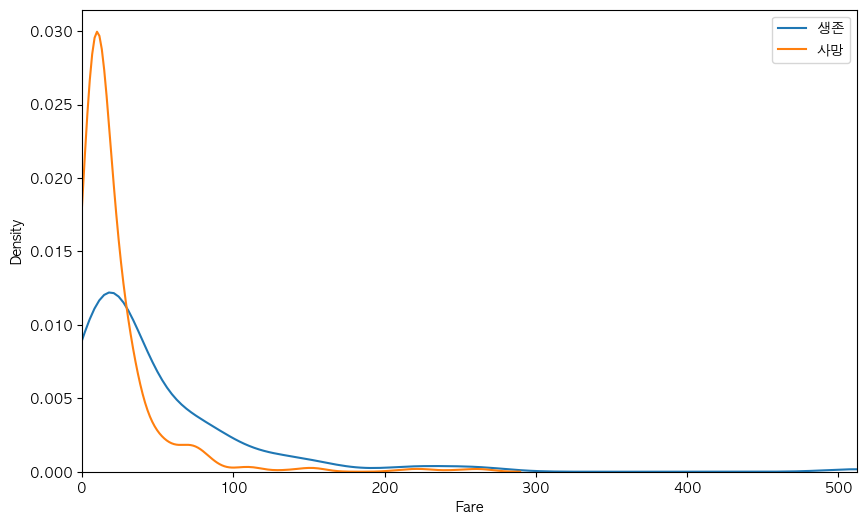

In [213]:
fig, ax = plt.subplots(figsize=(10,6))
 
# 분포 확인
sns.kdeplot(train[train['Survived']==1]['Fare'], ax=ax)
sns.kdeplot(train[train['Survived']==0]['Fare'], ax=ax)
 
# 축 범위
ax.set(xlim=(0, train['Fare'].max()))
ax.legend(['생존', '사망'])
 
plt.show()

In [214]:
train.columns
# Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
#        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype='object')

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [215]:
train.select_dtypes(include=['number']).corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [216]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [217]:
data_list = [train, test]

In [218]:
# int type의 숫자 0과 1로 매핑
for data in data_list:
    data['Sex'] = data['Sex'].astype('category').cat.codes
    
train['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int8

In [219]:
sex_mean = train.groupby('Sex')['Age'].mean()
sex_mean

Sex
0    27.915709
1    30.726645
Name: Age, dtype: float64

In [220]:
# Age 결측치 처리
for data in data_list:
    data.loc[(data['Sex'] == 0) & (data['Age'].isnull()), 'Age'] = sex_mean[0]
    data.loc[(data['Sex'] == 1) & (data['Age'].isnull()), 'Age'] = sex_mean[1]
    
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [221]:
# 카테고리화
train['AgeRange'] = pd.cut(train['Age'], 5)
train[['AgeRange', 'Survived']].groupby(['AgeRange']).mean()

,Survived
AgeRange,
"(0.34, 16.336]",0.550000
"(16.336, 32.252]",0.344168
"(32.252, 48.168]",0.404255
"(48.168, 64.084]",0.434783
"(64.084, 80.0]",0.090909


In [222]:
for data in data_list:    
    data.loc[ data['Age'] <= 16, 'Age'] = 0
    data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
    data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
    data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
    data.loc[ data['Age'] > 64, 'Age'] = 4
train.drop('AgeRange', inplace=True, axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,2.0,0,0,373450,8.0500,NaN,S


In [223]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [224]:
for data in data_list:
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    data['Title'] = data['Title'].replace(['Dr', 'Rev', 'Mlle', 'Major', 'Col', 'Countess',
                                        'Capt', 'Ms', 'Sir', 'Lady', 'Mme', 'Don', 'Jonkheer'], 'Other')
    # -> 범주형 -> 수치형
    data['Title_name'] = data['Title'].astype('category').cat.codes

In [225]:
train[['Title', 'Survived']].groupby(['Title']).mean()

,Survived
Title,
Master,0.575000
Miss,0.697802
Mr,0.156673
Mrs,0.792000
Other,0.444444


In [226]:
# 불필요한 데이터 지우기
train.drop(['Name', 'Title'], axis=1, inplace = True)
test.drop(['Name', 'Title'], axis=1, inplace = True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_name
0,1,0,3,1,1.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,0,2.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,0,2.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,1,2.0,0,0,373450,8.0500,NaN,S,2


In [227]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_name,FamilySize
0,1,0,3,1,1.0,1,0,A/5 21171,7.2500,NaN,S,2,2
1,2,1,1,0,2.0,1,0,PC 17599,71.2833,C85,C,3,2
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,0,2.0,1,0,113803,53.1000,C123,S,3,2
4,5,0,3,1,2.0,0,0,373450,8.0500,NaN,S,2,1


<Axes: xlabel='FamilySize', ylabel='count'>

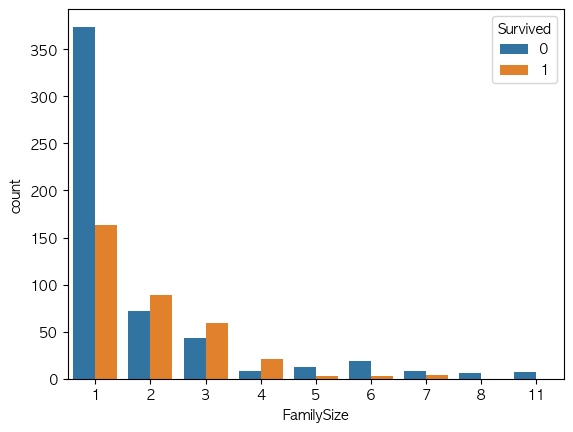

In [228]:
pd.pivot_table(train, index='FamilySize', values='Survived')
sns.countplot(data=train, x='FamilySize', hue='Survived')

In [229]:
#컬럼 제거
drop_list = ['SibSp', 'Parch']
for data in data_list:
    data.drop(drop_list, inplace=True, axis=1)

In [230]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

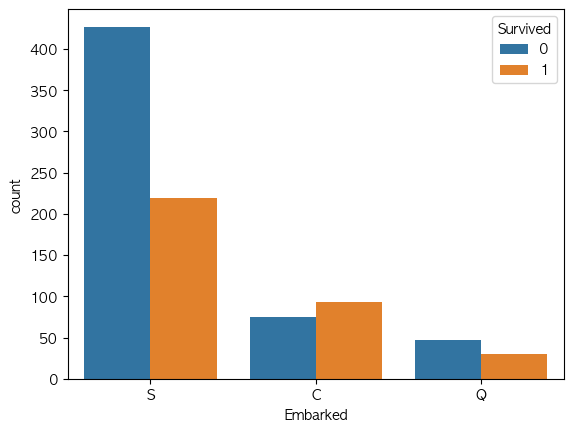

In [231]:
# 결측치 처리
for data in data_list:
    data['Embarked'] = data['Embarked'].fillna('S')
sns.countplot(data=train, x='Embarked', hue='Survived')

In [232]:
em_mapping = {'S':0, 'C':1, 'Q':2}
for data in data_list:
    data['Embarked'] = data['Embarked'].map(em_mapping)

In [233]:
train['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [234]:
for data in data_list:
    data['Cabin'] = data['Cabin'].fillna('N')
    data['Cabin'] = data['Cabin'].apply(lambda x:x[0])
    data['Cabin'] = data['Cabin'].astype('category').cat.codes
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title_name,FamilySize
0,1,0,3,1,1.0,A/5 21171,7.2500,7,0,2,2
1,2,1,1,0,2.0,PC 17599,71.2833,2,1,3,2
2,3,1,3,0,1.0,STON/O2. 3101282,7.9250,7,0,1,1
3,4,1,1,0,2.0,113803,53.1000,2,0,3,2
4,5,0,3,1,2.0,373450,8.0500,7,0,2,1


In [235]:
# 카테고리화
for data in data_list:
    data['Farerange'] = pd.cut(data['Fare'], 4)
train[['Farerange', 'Survived']].groupby(['Farerange']).mean()

,Survived
Farerange,
"(-0.512, 128.082]",0.368113
"(128.082, 256.165]",0.724138
"(256.165, 384.247]",0.666667
"(384.247, 512.329]",1.000000


In [236]:
for data in data_list:    
    data.loc[data['Fare'] <= 128, 'Fare'] = 0
    data.loc[(data['Fare'] > 128) & (data['Fare'] <= 256), 'Fare'] = 1
    data.loc[(data['Fare'] > 256) & (data['Fare'] <= 384), 'Fare'] = 2
    data.loc[data['Fare'] > 384, 'Fare'] = 3

train.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title_name,FamilySize,Farerange
0,1,0,3,1,1.0,A/5 21171,0.0,7,0,2,2,"(-0.512, 128.082]"
1,2,1,1,0,2.0,PC 17599,0.0,2,1,3,2,"(-0.512, 128.082]"
2,3,1,3,0,1.0,STON/O2. 3101282,0.0,7,0,1,1,"(-0.512, 128.082]"
3,4,1,1,0,2.0,113803,0.0,2,0,3,2,"(-0.512, 128.082]"
4,5,0,3,1,2.0,373450,0.0,7,0,2,1,"(-0.512, 128.082]"


In [237]:
# 컬럼 지우기
for data in data_list:
    data.drop('Farerange', axis=1, inplace=True)

In [238]:
drop_list = ['PassengerId', 'Ticket']
for data in data_list:
    data.drop(drop_list, inplace=True, axis=1)
    
for data in data_list:
    data.drop('Cabin', inplace=True, axis=1)

In [239]:
test[test['Fare'].isnull()] = test['Fare'].mean()

In [240]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title_name,FamilySize
0,0,3,1,1.0,0.0,0,2,2
1,1,1,0,2.0,0.0,1,3,2
2,1,3,0,1.0,0.0,0,1,1
3,1,1,0,2.0,0.0,0,3,2
4,0,3,1,2.0,0.0,0,2,1


In [241]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,Title_name,FamilySize
0,3.0,1.0,2.0,0.0,2.0,3.0,2.0
1,3.0,0.0,2.0,0.0,0.0,4.0,2.0
2,2.0,1.0,3.0,0.0,2.0,3.0,1.0
3,3.0,1.0,1.0,0.0,0.0,3.0,2.0
4,3.0,0.0,1.0,0.0,0.0,4.0,1.0


In [242]:
train.corr()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title_name,FamilySize
Survived,1.000000,-0.338481,-0.543351,-0.043800,0.147466,0.106811,-0.052471,0.016639
Pclass,-0.338481,1.000000,0.131900,-0.358769,-0.298580,0.045702,-0.195910,0.065997
Sex,-0.543351,0.131900,1.000000,0.070220,-0.114771,-0.116569,0.040484,-0.200988
Age,-0.043800,-0.358769,0.070220,1.000000,0.063220,-0.051334,0.427999,-0.217063
Fare,0.147466,-0.298580,-0.114771,0.063220,1.000000,0.047596,-0.044644,0.098769
Embarked,0.106811,0.045702,-0.116569,-0.051334,0.047596,1.000000,-0.081928,-0.080281
Title_name,-0.052471,-0.195910,0.040484,0.427999,-0.044644,-0.081928,1.000000,-0.207530
FamilySize,0.016639,0.065997,-0.200988,-0.217063,0.098769,-0.080281,-0.207530,1.000000


In [243]:
train_input = train.drop('Survived', axis=1).values
train_target = train['Survived'].values
print(train_input.shape, train_target.shape)  #(891, 7) (891,)

# 라이브러리
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

(891, 7) (891,)


In [244]:
model = KNeighborsClassifier()
score = cross_validate(model, train_input, train_target,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))
# 0.8369821296310886 0.8013495700207143

0.8361394330018754 0.80023225158496


In [245]:
model = DecisionTreeClassifier()
score = cross_validate(model, train_input, train_target,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))
# 0.872335203366059 0.8024982738057874

0.872335203366059 0.8002510827945514


In [246]:
model = RandomForestClassifier()
score = cross_validate(model, train_input, train_target,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))
# 0.872335203366059 0.7980164459230431

0.872335203366059 0.8013809553700332


In [247]:
model = GradientBoostingClassifier()
score = cross_validate(model, train_input, train_target,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))
# 0.8555009691602187 0.8204632477559475

0.8555009691602187 0.8204632477559475


In [248]:
model = HistGradientBoostingClassifier()
score = cross_validate(model, train_input, train_target,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))
# 0.8597093307278945 0.8126043562864854

0.8597093307278945 0.8126043562864854


In [249]:
model = GaussianNB()
score = cross_validate(model, train_input, train_target,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))
# 0.8117284145169169 0.812560416797439

0.8117284145169169 0.812560416797439


In [250]:
model = SVC()
score = cross_validate(model, train_input, train_target,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))
# 0.8366992609168413 0.8349946644906158

0.8366992609168413 0.8349946644906158


In [251]:
model = KNeighborsClassifier()
model.fit(train_input, train_target)
test_input = test.values
pred = model.predict(test_input)

#submission['Survived'] = pred
#submission
print(pred)

[0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0
 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1
 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0
 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0
 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0
 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0
 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0
 1 1 0 1 1 0 0 1 0 1 1]


In [252]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    float64
 1   Sex         418 non-null    float64
 2   Age         418 non-null    float64
 3   Fare        418 non-null    float64
 4   Embarked    418 non-null    float64
 5   Title_name  418 non-null    float64
 6   FamilySize  418 non-null    float64
dtypes: float64(7)
memory usage: 23.0 KB


In [253]:
from sklearn.metrics import accuracy_score

# pred와 submission['Survived'] 비교
accuracy = accuracy_score(submission['Survived'], pred)

# 전체 개수 비교
total_pred = len(pred)
total_submission = len(submission['Survived'])

print(f"Accuracy: {accuracy:.4f}")
print(f"Total in pred: {total_pred}, Total in submission: {total_submission}")


Accuracy: 0.7368
Total in pred: 418, Total in submission: 418


In [254]:
diff = submission['Survived'] != pred
print(submission.loc[diff, ['Survived']])  # submission에서 다른 값 출력
print(pred[diff])  # pred에서 다른 값 출력


     Survived
3           0
7           0
9           0
10          0
18          1
..        ...
407         0
409         1
412         1
416         0
417         0

[110 rows x 1 columns]
[1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1
 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0
 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1]


In [338]:
model = SVC()  # SVC 모델로 변경
model.fit(train_input, train_target)
test_input = test.values
pred = model.predict(test_input)


In [340]:
from sklearn.metrics import accuracy_score

# pred와 submission['Survived'] 비교
accuracy = accuracy_score(submission['Survived'], pred)

# 전체 개수 비교
total_pred = len(pred)
total_submission = len(submission['Survived'])

print(f"Accuracy: {accuracy:.4f}")
print(f"Total in pred: {total_pred}, Total in submission: {total_submission}")


Accuracy: 0.9761
Total in pred: 418, Total in submission: 418


In [342]:
diff = submission['Survived'] != pred
print(submission.loc[diff, ['Survived']])  # submission에서 다른 값 출력
print(pred[diff])  # pred에서 다른 값 출력


     Survived
59          1
63          1
86          1
88          1
119         1
152         0
159         1
176         1
324         1
409         1
[0 0 0 0 0 1 0 0 0 0]


Accuracy: 0.9761
Precision: 0.9931
Recall: 0.9408
F1-Score: 0.9662
Total in pred: 418, Total in submission: 418


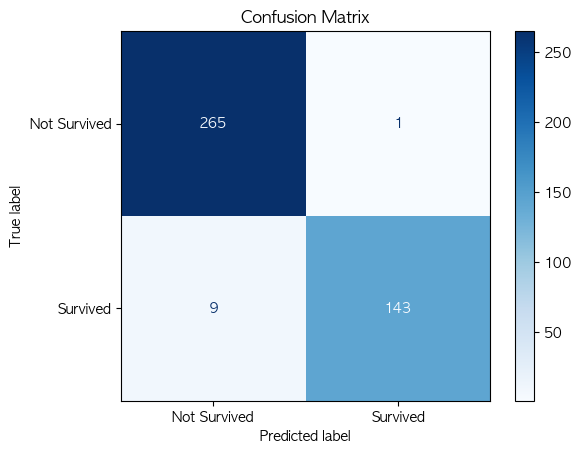

In [344]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

# 모델 학습
model = SVC()  # SVC 모델로 변경
model.fit(train_input, train_target)

# 예측값 생성
test_input = test.values
pred = model.predict(test_input)

# pred와 submission['Survived'] 비교
accuracy = accuracy_score(submission['Survived'], pred)
precision = precision_score(submission['Survived'], pred)
recall = recall_score(submission['Survived'], pred)
f1 = f1_score(submission['Survived'], pred)

# 전체 개수 비교
total_pred = len(pred)
total_submission = len(submission['Survived'])

# 결과 출력
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Total in pred: {total_pred}, Total in submission: {total_submission}")

# Confusion Matrix 출력
cm = confusion_matrix(submission['Survived'], pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
cm_display.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [346]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 모델 예측
model = SVC()  # SVC 모델로 변경
model.fit(train_input, train_target)
test_input = test.values
pred = model.predict(test_input)

# 정확도, 정밀도, 재현율, F1-Score 계산
accuracy = accuracy_score(submission['Survived'], pred)
precision = precision_score(submission['Survived'], pred)
recall = recall_score(submission['Survived'], pred)
f1 = f1_score(submission['Survived'], pred)

# 전체 개수 비교
total_pred = len(pred)
total_submission = len(submission['Survived'])

# 출력
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Total in pred: {total_pred}, Total in submission: {total_submission}")


Accuracy: 0.9761
Precision: 0.9931
Recall: 0.9408
F1-Score: 0.9662
Total in pred: 418, Total in submission: 418


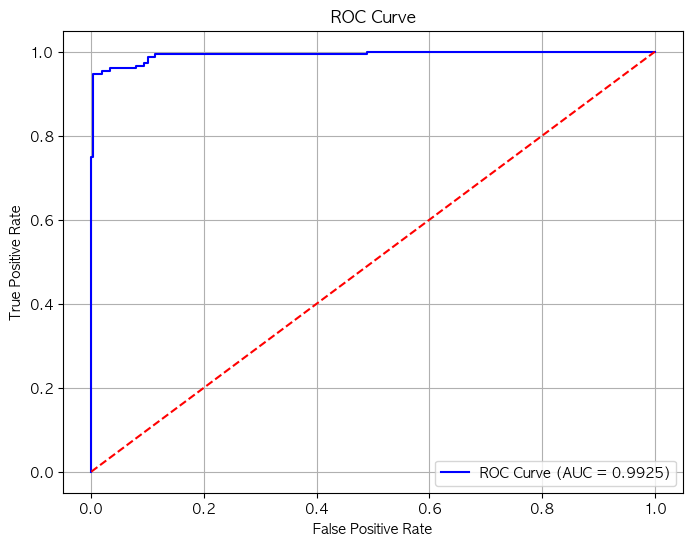

AUC Score: 0.9925


In [350]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# SVC 모델을 probability=True로 설정
model = SVC(probability=True)

# 모델 학습
model.fit(train_input, train_target)

# 모델 예측 확률 추출 (predict_proba는 이진 분류일 경우 사용)
probabilities = model.predict_proba(test_input)[:, 1]  # 양성 클래스 (Survived=1) 확률만 추출

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(submission['Survived'], probabilities)

# AUC 계산
auc = roc_auc_score(submission['Survived'], probabilities)

# ROC Curve 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')  # 무작위 분류 선 (대각선)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# AUC 출력
print(f"AUC Score: {auc:.4f}")


In [356]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# train_input이 numpy.ndarray 형식이므로, 이를 DataFrame으로 변환
train_input_df = pd.DataFrame(train_input)

# 결측치가 있는 행을 제거
train_input_df = train_input_df.dropna(axis=0)

# 상수 항을 추가
X = sm.add_constant(train_input_df)

# 상수형 컬럼(표준편차가 0인 컬럼) 제거
X = X.loc[:, X.std() != 0]

# 각 피쳐의 VIF 계산
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# VIF 결과 출력
print(vif_data)


  Feature       VIF
0       0  5.856685
1       1  2.958783
2       2  4.274359
3       3  1.110040
4       4  1.335276
5       5  6.613982
6       6  2.318978


In [258]:
from sklearn.metrics import accuracy_score

# 훈련 데이터 정확도
train_pred = model.predict(train_input)
train_accuracy = accuracy_score(train_target, train_pred)

# 테스트 데이터 정확도
test_accuracy = accuracy_score(submission['Survived'], pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# 과적합 여부 확인
if train_accuracy > test_accuracy + 0.1:  # 차이가 10% 이상이면 과적합 가능성 높음
    print("과적합 가능성이 있습니다.")
else:
    print("과적합 가능성이 낮습니다.")


Train Accuracy: 0.8373
Test Accuracy: 0.9761
과적합 가능성이 낮습니다.


In [259]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
import numpy as np

# K-Fold 설정 (StratifiedKFold는 클래스 비율을 유지하면서 분할)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 교차 검증 실행 (SVC 모델 사용)
cv_scores = cross_val_score(model, train_input, train_target, cv=kf, scoring='accuracy')

# 결과 출력
print(f"K-Fold Cross Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

# 과적합 여부 판단
if np.max(cv_scores) - np.min(cv_scores) > 0.1:  # Fold 간 차이가 크면 과적합 가능성 있음
    print("과적합 가능성이 있습니다.")
else:
    print("과적합 가능성이 낮습니다.")


K-Fold Cross Validation Scores: [0.83798883 0.81460674 0.82022472 0.83707865 0.84831461]
Mean Accuracy: 0.8316
Standard Deviation: 0.0124
과적합 가능성이 낮습니다.


In [326]:
model = GaussianNB()
model.fit(train_input, train_target)
test_input = test.values
pred = model.predict(test_input)

In [328]:
from sklearn.metrics import accuracy_score

# pred와 submission['Survived'] 비교
accuracy = accuracy_score(submission['Survived'], pred)

# 전체 개수 비교
total_pred = len(pred)
total_submission = len(submission['Survived'])

print(f"Accuracy: {accuracy:.4f}")
print(f"Total in pred: {total_pred}, Total in submission: {total_submission}")


Accuracy: 0.9139
Total in pred: 418, Total in submission: 418


In [330]:
model = RandomForestClassifier()
model.fit(train_input, train_target)
test_input = test.values
pred = model.predict(test_input)

In [332]:
from sklearn.metrics import accuracy_score

# pred와 submission['Survived'] 비교
accuracy = accuracy_score(submission['Survived'], pred)

# 전체 개수 비교
total_pred = len(pred)
total_submission = len(submission['Survived'])

print(f"Accuracy: {accuracy:.4f}")
print(f"Total in pred: {total_pred}, Total in submission: {total_submission}")


Accuracy: 0.8373
Total in pred: 418, Total in submission: 418


In [334]:
model = GradientBoostingClassifier()
model.fit(train_input, train_target)
test_input = test.values
pred = model.predict(test_input)

In [336]:
from sklearn.metrics import accuracy_score

# pred와 submission['Survived'] 비교
accuracy = accuracy_score(submission['Survived'], pred)

# 전체 개수 비교
total_pred = len(pred)
total_submission = len(submission['Survived'])

print(f"Accuracy: {accuracy:.4f}")
print(f"Total in pred: {total_pred}, Total in submission: {total_submission}")


Accuracy: 0.8636
Total in pred: 418, Total in submission: 418
